### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


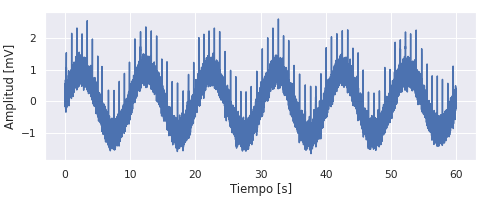

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


<IPython.core.display.Javascript object>


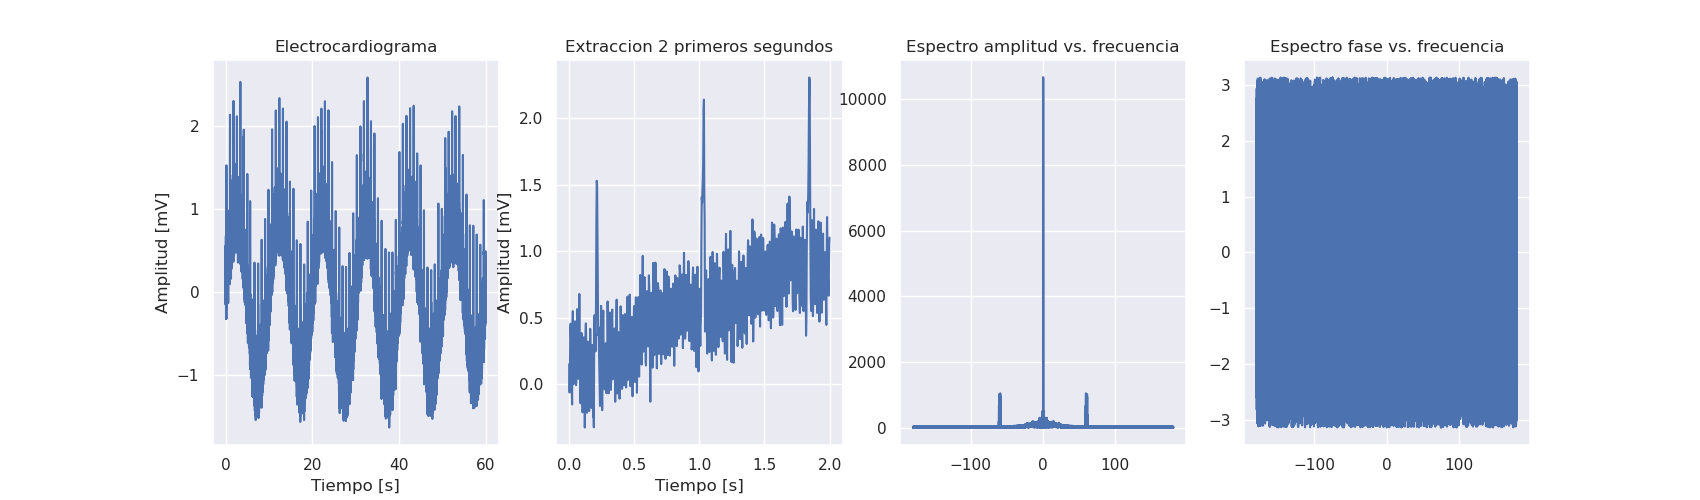

Text(0.5, 1.0, 'Espectro fase vs. frecuencia')

In [16]:
import scipy.fft as sfft


time1 = np.arange(len(data))/(Fs)
time2 = np.linspace(start=0,stop=2,num=720)
data2 = data[:720]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(17,5))
ax1.plot(time1, data)
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud [mV]')
ax1.set_title('Electrocardiograma')
ax2.plot(time2, data2)
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Amplitud [mV]')
ax2.set_title('Extraccion 2 primeros segundos')


s = sfft.fft(data, len(data))
SA = np.absolute(s)
SP = np.angle(s)
freqs = sfft.fftfreq(len(data), 1/Fs)
ax3.set_title("Espectro amplitud vs. frecuencia")
ax3.plot(sfft.fftshift(freqs),sfft.fftshift(SA))
ax4.plot(freqs, SP)
ax4.set_title("Espectro fase vs. frecuencia")


                
En primer lugar, el gráfico del electrocardiograma estudia la frecuencia cardiaca de un paciente. De este, sabemos que debe entregar un gráfico con pulsaciones, sin embargo, el gráfico obtenido por el dispositivo entrega claramente una interferencia periódica, la cual está representada por una sinusoide.

El segundo gráfico, el cual contempla las muestras obtenidas en los tiempos [0, 2] segundos presenta de mejor manera un ruido de baja amplitud que perturba los datos relevantes para el estudio clínico.


El tercer gráfico presenta amplitud vs frecuencia de la muestra. Claramente se puede apreciar que la muestra está compuesta por componentes que se alzan del piso del ruido, además, el ruido está presente en todas las frecuencias, por esta razón decimos que es ruido blanco.    
Se entiende por ruido blanco a una señal estocástica que está presente en toda la extensión de la muestra.



<IPython.core.display.Javascript object>


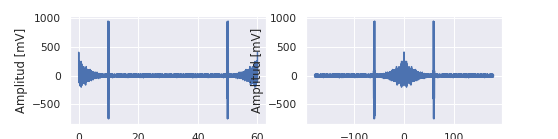

/home/rickiwasho/miniconda3/envs/programming/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/rickiwasho/miniconda3/envs/programming/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitud [mV]')

In [3]:
fig, (ax5, ax6) = plt.subplots(1,2, figsize=(8,2))
ax5.plot(time1, s)
ax5.set_xlabel('Tiempo [s]')
ax5.set_ylabel('Amplitud [mV]')

ax6.plot(freqs, s)
ax6.set_xlabel('Frecuencia [Hz]')
ax6.set_ylabel('Amplitud [mV]')



### apuntes

    Ruido asociado al sistema eléctrico:
    Ruido de baja frecuencia causado por un desperfecto del sensor:
    Ruido blanco de origen térmico:

    Ruido termico, ruido de lectura, ruido electrónico: se modelan tipicamente como ruido gaussiano
    ruido sal y pimienta o ruido impulsivo: se traduce en pixeles que se saturan en sus valores maximos/minimos
    interferencia periodica: puede modelarse como una sinusoide

### Preguntas

    ¿Qué es un ruido blanco?¿Qué tipo de efecto introduce en la señal y en su espectro?

    ¿Qué es una tendencia?¿Qué tipo de efecto introduce en la señal y su espectro?



## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR
